In [3]:
import cantera as ct
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
gas = ct.Solution("gri30_highT.xml")
rxns = [rxn for rxn in gas.reactions() if "CO2" in [*rxn.reactants.keys(),*rxn.products.keys()]][1:]  # first has no rate
temps = np.linspace(300, 3000, 10)
rates = np.zeros((len(temps), len(rxns)))
for i, temp in enumerate(temps):
    for j, rxn in enumerate(rxns):
        rates[i, j] = rxn.rate.pre_exponential_factor * temp**rxn.rate.temperature_exponent + np.exp(-rxn.rate.activation_energy/(ct.gas_constant*temp))

data = pd.DataFrame(index=temps, columns=rxns, data=rates)

<Axes: >

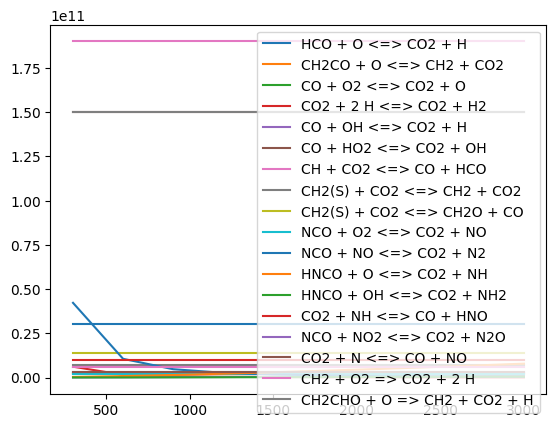

In [7]:
data.plot()

In [26]:
top_5 = data.loc[3000].sort_values()[::-1][:5]
top_5

CH + CO2 <=> CO + HCO          1.900000e+11
CH2CHO + O => CH2 + CO2 + H    1.500000e+11
CO + HO2 <=> CO2 + OH          1.500000e+11
HCO + O <=> CO2 + H            3.000000e+10
CH2(S) + CO2 <=> CH2O + CO     1.400000e+10
Name: 3000.0, dtype: float64

<Axes: >

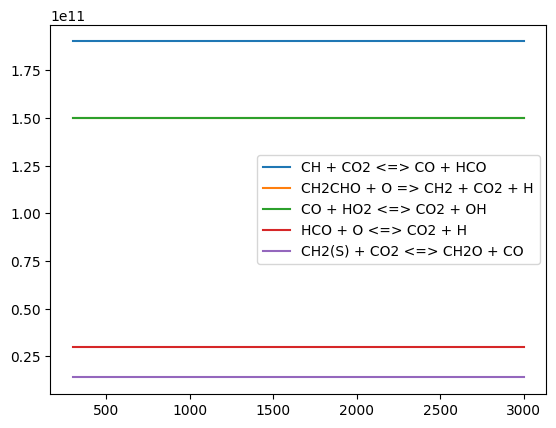

In [29]:
data.filter(top_5.index).plot()

In [33]:
[print(rxn.rate) for rxn in top_5.index];

Arrhenius(A=1.9e+11, b=0, E=6.60737e+07)
Arrhenius(A=1.5e+11, b=0, E=0)
Arrhenius(A=1.5e+11, b=0, E=9.87424e+07)
Arrhenius(A=3e+10, b=0, E=0)
Arrhenius(A=1.4e+10, b=0, E=0)
